In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt
import scipy.stats as stats
import random
import os
os.chdir('/Users/bellepeng/Desktop/Metis/Work/Projects/P3_Spam')

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from operator import itemgetter, attrgetter, methodcaller

In [103]:
# Universal Modeling Tools
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Eval
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [57]:
def Eval(y, pred):
    mat=confusion_matrix(y, pred)
    print("Accuracy: ",  f'{accuracy_score(y, pred):4.2%}')
    print("Precision: ", f'{precision_score(y, pred):4.2%}')
    print("Recall: ", f'{recall_score(y, pred):4.2%}')
    print("ROC AUC: ", f'{roc_auc_score(y, pred):4.2%}')
    print('False Negative Rate:', f'{ (mat[1][0]/(mat[0][0]+mat[1][0])):4.2%}')
    print('False Positve Rate:', f'{ (mat[0][1]/(mat[1][1]+mat[0][1])): 4.2%}')

    return pd.DataFrame(mat, columns=['Pred NOT Spam', 'Pred Spam'], 
                        index=['Actual NOT Spam', 'Actual Spam'])

### Load

In [58]:
%run '/Users/bellepeng/Desktop/Metis/Work/Projects/P3_Spam/data/col_names.py' # saved the column names in a sep .py to make it more readable
df1 = pd.read_table('/Users/bellepeng/Desktop/Metis/Work/Projects/P3_Spam/data/spambase_data.txt', sep=',', header=None)
df1.columns=columns
print(df1.shape)
df1.head()

(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [59]:
os.chdir('/Users/bellepeng/Desktop/Metis/Work/Projects/P3_Spam')
with open("emails_parsed.pkl", 'rb') as picklefile: 
    df2 = pickle.load(picklefile)

print(df2.shape)
df2.head()

(2145, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
Id,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.000000,0.0,0.0,2.040816,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1,2,1
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,10,40,1
5,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.818182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.428571,3,20,1
6,0.735294,0.735294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.461538,3,19,0
7,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.300000,6,26,0


### Transform

In [60]:
# Fix Nulls
def fix_null(df, var):
    print(df.isnull().sum()[df.isnull().sum()>0])
    df[var][df[var].isnull()]=0
    print(df.isnull().sum()[df.isnull().sum()>0])

fix_null(df1, 'capital_run_length_average')
fix_null(df2, 'capital_run_length_average')

Series([], dtype: int64)
Series([], dtype: int64)
capital_run_length_average    2
dtype: int64
Series([], dtype: int64)


In [61]:
# Log all my features
def log_var(x):
    if x==0 or x=="nan": return 0
    else: return np.log(x)

In [62]:
def log_dataset(df):
    df_logged = df.copy()
    for i in range(len(df.columns)-1):
        df_logged[df_logged.columns[i]] = [log_var(x) for x in df_logged[df_logged.columns[i]]]
    return df_logged

In [63]:
df1_logged=log_dataset(df1)
df2_logged=log_dataset(df2)

In [64]:
# Split into Test and Train (orig without log)
X1_train, X1_test, y1_train, y1_test = train_test_split(df1.iloc[:, :-1], df1.iloc[:, -1], test_size = 0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size = 0.2, random_state=42)

In [65]:
# Split into Test and Train (with log)
X1_train_logged, X1_test_logged, y1_train_logged, y1_test_logged = \
    train_test_split(df1_logged.iloc[:, :-1], df1_logged.iloc[:, -1], test_size = 0.2, random_state=42)
X2_train_logged, X2_test_logged, y2_train_logged, y2_test_logged = \
    train_test_split(df2_logged.iloc[:, :-1], df2_logged.iloc[:, -1], test_size = 0.2, random_state=42)

In [66]:
# Scale the Logged Features
from sklearn.preprocessing import StandardScaler
ssX1 = StandardScaler()
X1_train_logscaled=ssX1.fit_transform(X1_train_logged)
X1_test_logscaled=ssX1.transform(X1_test_logged)

ssX2 = StandardScaler()
X2_train_logscaled=ssX2.fit_transform(X2_train_logged)
X2_test_logscaled=ssX2.transform(X2_test_logged)

## Model Testing on df1

In [67]:
# Naive Bayes - Multi using unlogged and unscaled data
NB_Multi1= MultinomialNB()
params_nbm1 = {
    'alpha': list(range(0,10)) 
}
grid_nbm1 = GridSearchCV(NB_Multi1, param_grid=params_nbm1, cv=10)
grid_nbm1.fit(X1_train, y1_train)
print("Train score:", grid_nbm1.best_score_)
print("Test score:", grid_nbm1.best_estimator_.score(X1_test, y1_test))
grid_nbm1.best_estimator_

print("Train Report")
pred_nbm1_tr = grid_nbm1.predict(X1_train)
Eval(y1_train, pred_nbm1_tr)

print("Test Report")
pred_nbm1_test = grid_nbm1.predict(X1_test)
Eval(y1_test, pred_nbm1_test)

Train score: 0.7923913043478261
Test score: 0.7871878393051032
Accuracy:  79.51%
Precision:  74.69%
Recall:  71.12%
ROC AUC:  77.96%
False Negative Rate: 17.68%
False Positve Rate:  25.31%
Accuracy:  78.72%
Precision:  76.50%
Recall:  71.79%
ROC AUC:  77.80%
False Negative Rate: 19.82%
False Positve Rate:  23.50%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,445,86
Actual Spam,110,280


In [68]:
# Naive Bayes - Gaussian using unlogged unscaled data
NB_G1= GaussianNB()
scores_NBG1_prec = cross_val_score(NB_G1, X1_train, y1_train, scoring='precision', n_jobs=1)
print("Precision: " + str(np.mean(scores_NBG1_prec)))
scores_NBG1_acc = cross_val_score(NB_G1, X1_train, y1_train, scoring='accuracy', n_jobs=1)
print("Accuracy: " + str(np.mean(scores_NBG1_acc)))

Precision: 0.6950366739022401
Accuracy: 0.8198448207760555


In [69]:
# Naive Bayes - Bernoulli using unlogged and unscaled data
NB_Bern1 = BernoulliNB()
params_nbb1 = {
    'alpha': list(range(0,10)) ,
    'binarize': list(range(0,50, 10)) 
}
grid_nbb1 = GridSearchCV(NB_Bern1, param_grid=params_nbb1, cv=10)
grid_nbb1.fit(X1_train, y1_train)
print("Train score:", grid_nbb1.best_score_)
print("Test score:", grid_nbb1.best_estimator_.score(X1_test, y1_test))
grid_nbb1.best_estimator_

print("Train Report")
pred_nbb1_tr = grid_nbb1.predict(X1_train)
Eval(y1_train, pred_nbb1_tr)

print("Test Report")
pred_nbb1_test = grid_nbb1.predict(X1_test)
Eval(y1_test, pred_nbb1_test)

Train score: 0.8855978260869565
Test score: 0.8794788273615635
Accuracy:  88.64%
Precision:  88.10%
Recall:  81.66%
ROC AUC:  87.35%
False Negative Rate: 11.05%
False Positve Rate:  11.90%
Accuracy:  87.95%
Precision:  90.43%
Recall:  80.00%
ROC AUC:  86.89%
False Negative Rate: 13.54%
False Positve Rate:  9.57%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,498,33
Actual Spam,78,312


In [73]:
rf1 = RandomForestClassifier()
params_rf1 = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': list(range(300,500,50)),
    'max_depth': list(range(3,26,2)),
    'min_samples_leaf': list(range(1,6,2)),
}
grid_rf1 = GridSearchCV(rf1, param_grid=params_rf1, cv=5)
grid_rf1.fit(X1_train, y1_train)
print("Train score:", grid_rf1.best_score_)
print("Test score:", grid_rf1.best_estimator_.score(X1_test, y1_test))
grid_rf1.best_estimator_

print("Train Report")
pred_rf1_tr = grid_rf1.predict(X1_train)
Eval(y1_train, pred_rf1_tr)
print()
print("Test Report")
pred_rf1_test = grid_rf1.predict(X1_test)
Eval(y1_test, pred_rf1_test)

Train score: 0.9532608695652174
Test score: 0.9565689467969598
Accuracy:  99.73%
Precision:  99.93%
Recall:  99.37%
ROC AUC:  99.66%
False Negative Rate: 0.40%
False Positve Rate:  0.07%
Accuracy:  95.66%
Precision:  97.04%
Recall:  92.56%
ROC AUC:  95.25%
False Negative Rate: 5.28%
False Positve Rate:  2.96%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,520,11
Actual Spam,29,361


In [75]:
pickle.dump(grid_rf1, open('grid_rf1.pkl', 'wb'))

## Model Testing on df2

In [70]:
# Naive Bayes - Multi using unlogged and unscaled data
NB_Multi2 = MultinomialNB()
params_nbm2 = {
    'alpha': list(range(0,10)) 
}
grid_nbm2 = GridSearchCV(NB_Multi2, param_grid=params_nbm2, cv=10)
grid_nbm2.fit(X2_train, y2_train)
print("Train score:", grid_nbm2.best_score_)
print("Test score:", grid_nbm2.best_estimator_.score(X2_test, y2_test))
grid_nbm2.best_estimator_

print("Train Report")
pred_nbm2_tr = grid_nbm2.predict(X2_train)
Eval(y2_train, pred_nbm2_tr)
print()
print("Test Report")
pred_nbm2_test = grid_nbm2.predict(X2_test)
Eval(y2_test, pred_nbm2_test)

Train score: 0.7902097902097902
Test score: 0.7668997668997669
Accuracy:  79.20%
Precision:  70.83%
Recall:  42.77%
ROC AUC:  67.99%
False Negative Rate: 19.12%
False Positve Rate:  29.17%
Accuracy:  76.69%
Precision:  68.00%
Recall:  40.16%
ROC AUC:  66.11%
False Negative Rate: 21.47%
False Positve Rate:  32.00%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,278,24
Actual Spam,76,51


In [71]:
# Naive Bayes - Gaussian using unlogged unscaled data
NB_G2= GaussianNB()
scores_NBG2_prec = cross_val_score(NB_G2, X2_train, y2_train, scoring='precision', n_jobs=1)
print("Precision: " + str(np.mean(scores_NBG2_prec)))
scores_NBG2_acc = cross_val_score(NB_G2, X2_train, y2_train, scoring='accuracy', n_jobs=1)
print("Accuracy: " + str(np.mean(scores_NBG2_acc)))

Precision: 0.42155221589417513
Accuracy: 0.6235431235431236


In [72]:
# Naive Bayes - Bernoulli using unlogged and unscaled data
NB_Bern2 = BernoulliNB()
params_nbb2 = {
    'alpha': list(range(0,10)) ,
    'binarize': list(range(0,50, 10)) 
}
grid_nbb2 = GridSearchCV(NB_Bern2, param_grid=params_nbb2, cv=10)
grid_nbb2.fit(X2_train, y2_train)
print("Train score:", grid_nbb2.best_score_)
print("Test score:", grid_nbb2.best_estimator_.score(X2_test, y2_test))
grid_nbb2.best_estimator_

print("Train Report")
pred_nbb2_tr = grid_nbb2.predict(X2_train)
Eval(y2_train, pred_nbb2_tr)
print()
print("Test Report")
pred_nbb2_test = grid_nbb2.predict(X2_test)
Eval(y2_test, pred_nbb2_test)

Train score: 0.8006993006993007
Test score: 0.7762237762237763
Accuracy:  81.35%
Precision:  69.48%
Recall:  58.70%
ROC AUC:  74.39%
False Negative Rate: 15.00%
False Positve Rate:  30.52%
Accuracy:  77.62%
Precision:  63.03%
Recall:  59.06%
ROC AUC:  72.24%
False Negative Rate: 16.77%
False Positve Rate:  36.97%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,258,44
Actual Spam,52,75


In [74]:
rf2 = RandomForestClassifier()
params_rf2 = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': list(range(300,500,50)),
    'max_depth': list(range(3,26,2)),
    'min_samples_leaf': list(range(1,6,2)),
}
grid_rf2 = GridSearchCV(rf2, param_grid=params_rf2, cv=5)
grid_rf2.fit(X2_train, y2_train)
print("Train score:", grid_rf2.best_score_)
print("Test score:", grid_rf2.best_estimator_.score(X2_test, y2_test))
grid_rf2.best_estimator_

print("Train Report")
pred_rf2_tr = grid_rf2.predict(X2_train)
Eval(y2_train, pred_rf2_tr)
print()
print("Test Report")
pred_rf2_test = grid_rf2.predict(X2_test)
Eval(y2_test, pred_rf2_test)

Train score: 0.9353146853146853
Test score: 0.9137529137529138
Accuracy:  99.24%
Precision:  99.79%
Recall:  97.48%
ROC AUC:  98.70%
False Negative Rate: 0.96%
False Positve Rate:  0.21%
Accuracy:  91.38%
Precision:  87.50%
Recall:  82.68%
ROC AUC:  88.86%
False Negative Rate: 7.12%
False Positve Rate:  12.50%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,287,15
Actual Spam,22,105


### Saving and reopening the models

In [77]:
os.chdir('/Users/bellepeng/Desktop/Metis/Work/Projects/P3_Spam')
import pickle
pickle.dump(grid_rf2, open('grid_rf2.pkl', 'wb'))

In [79]:
model1=pickle.load(open('grid_rf1.pkl', 'rb'))
model2=pickle.load(open('grid_rf2.pkl', 'rb'))

In [80]:
model1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=23, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
model2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
print("Train Reort - DF1")
print(classification_report(y1_train, pred_rf1_tr))
print("Test Reort - DF1")
print(classification_report(y1_test, pred_rf1_test))

Train Reort
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2257
          1       1.00      0.99      1.00      1423

avg / total       1.00      1.00      1.00      3680

Test Reort
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       531
          1       0.97      0.93      0.95       390

avg / total       0.96      0.96      0.96       921



In [88]:
print("Train Reort - DF2")
print(classification_report(y2_train, pred_rf2_tr))
print("Test Reort - DF2")
print(classification_report(y2_test, pred_rf2_test))

Train Reort
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1239
          1       1.00      0.97      0.99       477

avg / total       0.99      0.99      0.99      1716

Test Reort
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       302
          1       0.88      0.83      0.85       127

avg / total       0.91      0.91      0.91       429



In [90]:
print("Train Report")
pred_rf1_tr = grid_rf1.predict(X1_train)
Eval(y1_train, pred_rf1_tr)
print()
print("Test Report")
pred_rf1_test = grid_rf1.predict(X1_test)
Eval(y1_test, pred_rf1_test)

Train Report
Accuracy:  99.73%
Precision:  99.93%
Recall:  99.37%
ROC AUC:  99.66%
False Negative Rate: 0.40%
False Positve Rate:  0.07%

Test Report
Accuracy:  95.66%
Precision:  97.04%
Recall:  92.56%
ROC AUC:  95.25%
False Negative Rate: 5.28%
False Positve Rate:  2.96%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,520,11
Actual Spam,29,361


In [91]:
print("Train Report")
pred_rf2_tr = grid_rf2.predict(X2_train)
Eval(y2_train, pred_rf2_tr)
print()
print("Test Report")
pred_rf2_test = grid_rf2.predict(X2_test)
Eval(y2_test, pred_rf2_test)

Train Report
Accuracy:  99.24%
Precision:  99.79%
Recall:  97.48%
ROC AUC:  98.70%
False Negative Rate: 0.96%
False Positve Rate:  0.21%

Test Report
Accuracy:  91.38%
Precision:  87.50%
Recall:  82.68%
ROC AUC:  88.86%
False Negative Rate: 7.12%
False Positve Rate:  12.50%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,287,15
Actual Spam,22,105


ROC AUC score =  0.9874330001448646


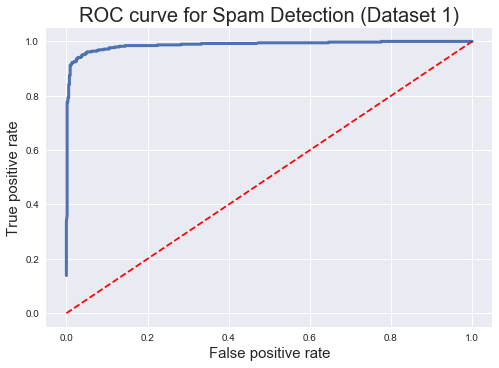

In [104]:
fpr, tpr, thresholds = roc_curve(y1_test, grid_rf1.predict_proba(X1_test)[:,1])
plt.plot(fpr, tpr,lw=3)
plt.plot([0,1],[0,1],c='r',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', fontsize=15)
plt.ylabel('True positive rate', fontsize=15)
plt.title('ROC curve for Spam Detection (Dataset 1)', fontsize=20);
print("ROC AUC score = ", roc_auc_score(y1_test, grid_rf1.predict_proba(X1_test)[:,1]))

ROC AUC score =  0.9529123429107785


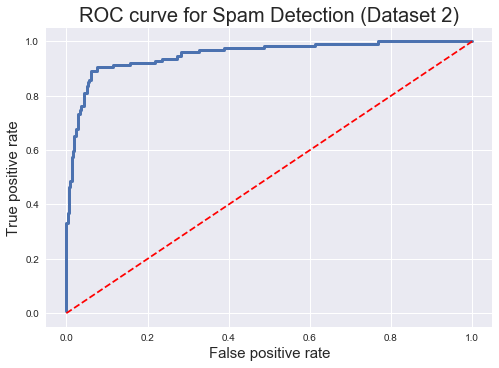

In [106]:
fpr, tpr, thresholds = roc_curve(y2_test, grid_rf2.predict_proba(X2_test)[:,1])
plt.plot(fpr, tpr,lw=3)
plt.plot([0,1],[0,1],c='r',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', fontsize=15)
plt.ylabel('True positive rate', fontsize=15)
plt.title('ROC curve for Spam Detection (Dataset 2)', fontsize=20);
print("ROC AUC score = ", roc_auc_score(y2_test, grid_rf2.predict_proba(X2_test)[:,1]))